In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# This function is to plot the confusion matrix.

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

Load the data

In [3]:
data = pd.read_csv("dataset_part_2.csv")

X = pd.read_csv("dataset_part_3.csv")

In [4]:
data.head(1)
# This has "LandingClass" 0 or 1
# We creat ML-model to predict is next launch 0 or 1 (failure or success)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,LandingClass
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0


In [5]:
X.head(1)
# This dataframe has all numerical and boolean values that are used to train the model and ques if next launch is 0 or 1

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Create a NumPy array from the column LandingClass in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).

In [6]:
Y = data["LandingClass"].to_numpy()

Standardize the data in X then reassign it to the variable X using the transform provided below.

transform = preprocessing.StandardScaler()

We split the data into training and testing data using the function train_test_split. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function GridSearchCV.

In [7]:
# Tässä IBM ja Chatin vastaus eroaa toisistaan: chatin mukaan kumpikin tapa toimii, mutta silti eroaa toisistaan

from sklearn.preprocessing import StandardScaler

# Assuming you have your data in a DataFrame named X
transform = StandardScaler()
X_standardized = transform.fit_transform(X)


In [8]:
from sklearn.model_selection import train_test_split

# Assuming you have your data and labels as X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size=0.2, random_state=2)


In [9]:
Y_test.shape

(18,)

Task 4

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

logreg_cv = GridSearchCV(lr, parameters, cv=10)


logreg_cv.fit(X_train, Y_train)


print("tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("accuracy:", logreg_cv.best_score_)


tuned hyperparameters (best parameters): {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy: 0.8214285714285714


Task 5

In [11]:
# Assuming you have already trained your model (logreg_cv) on X_train and Y_train

# Make predictions on the test data
y_pred = logreg_cv.predict(X_test)

# Calculate accuracy
accuracy = logreg_cv.score(X_test, Y_test)

print("Accuracy on test data:", accuracy)


Accuracy on test data: 0.8333333333333334


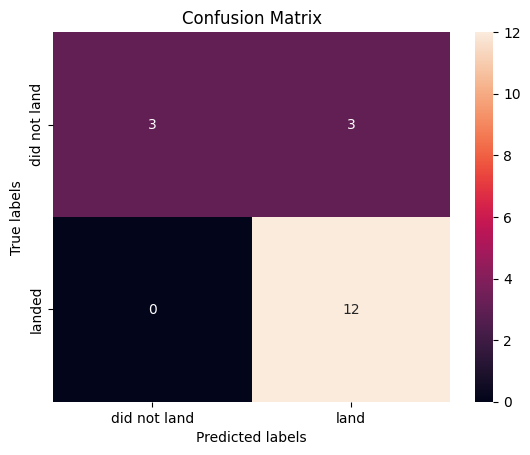

In [12]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. 
# # We see that the major problem is false positives.

Task 6

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Define the parameter grid to search
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create an SVM object
svm = SVC()

# Create a GridSearchCV object with cross-validation (cv) set to 10
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
svm_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [14]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


In [15]:
# Assuming you have already imported the necessary libraries, including SVC from sklearn.svm

# Create an SVM model with the best hyperparameters
best_svm_model = SVC(C=1.0, gamma=0.03162277660168379, kernel='sigmoid')

# Fit the model to the training data
best_svm_model.fit(X_train, Y_train)

# Use the trained model to make predictions on the test data
Y_pred = best_svm_model.predict(X_test)

# Calculate the accuracy on the test data
accuracy = best_svm_model.score(X_test, Y_test)

# Print the accuracy
print("Accuracy on test data:", accuracy)


Accuracy on test data: 0.8333333333333334


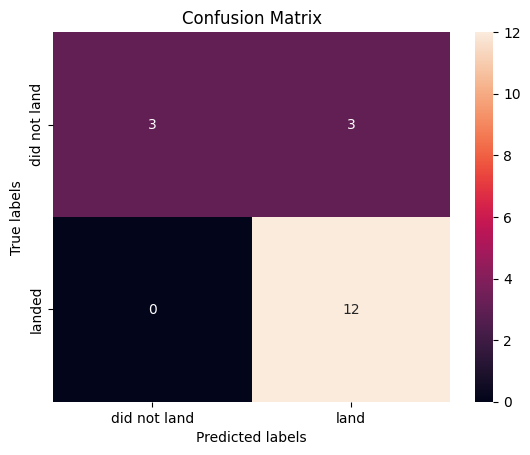

In [16]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create a DecisionTreeClassifier object
tree = DecisionTreeClassifier()

# Create a GridSearchCV object with cross-validation (cv) set to 10
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
tree_cv.fit(X_train, Y_train)

print("tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("accuracy:", tree_cv.best_score_)



c:\Users\OMISTAJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\OMISTAJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\OMISTAJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\OMISTAJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been depre

tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
accuracy: 0.8482142857142858


Accuracy on test data: 0.7222222222222222


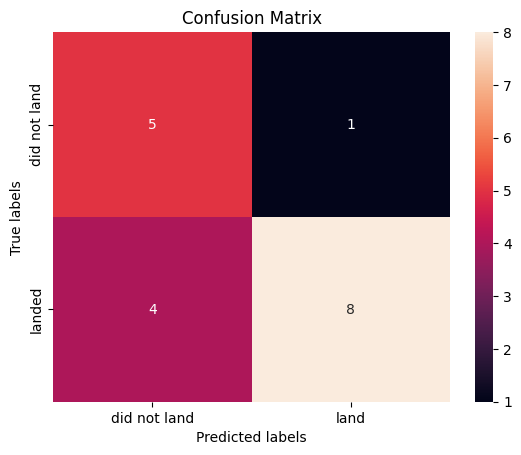

In [18]:
# Assuming you have already trained your model (tree_cv) on X_train and Y_train
# Now, you want to evaluate its accuracy on the test data

# Import the necessary library
from sklearn.metrics import accuracy_score

# Make predictions on the test data using the trained model
y_pred = tree_cv.predict(X_test)

# Calculate the accuracy by comparing the predicted labels (y_pred) to the actual labels (Y_test)
accuracy = accuracy_score(Y_test, y_pred)

# Print the accuracy score
print("Accuracy on test data:", accuracy)

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Nyt kuva muuttui - ehkä vähän paremmaksi

In [19]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a KNN classifier object
KNN = KNeighborsClassifier()

# Define the parameter grid to search
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a GridSearchCV object with cross-validation (cv) set to 10
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
knn_cv.fit(X_train, Y_train)

# Print the best hyperparameters and accuracy score
print("tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("accuracy:", knn_cv.best_score_)


tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy: 0.8339285714285714


Accuracy on test data: 0.7777777777777778


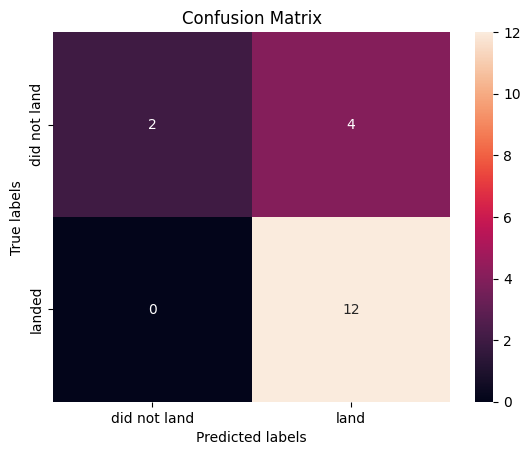

In [20]:
# Make predictions on the test data using the trained KNN model
y_pred = knn_cv.predict(X_test)

# Calculate accuracy by comparing predicted labels (y_pred) to actual labels (Y_test)
accuracy = knn_cv.score(X_test, Y_test)

# Print the accuracy score
print("Accuracy on test data:", accuracy)

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Nyt alla olevat palautui siihen mistä lähtivät, mutta ylärivi muuttui: ei ole enää 3 ja 3


tuned hyperparameters (best parameters) for logistic regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy of logistic regression: 0.8214285714285714
Accuracy on test data in logistic regression: 0.8333333333333334


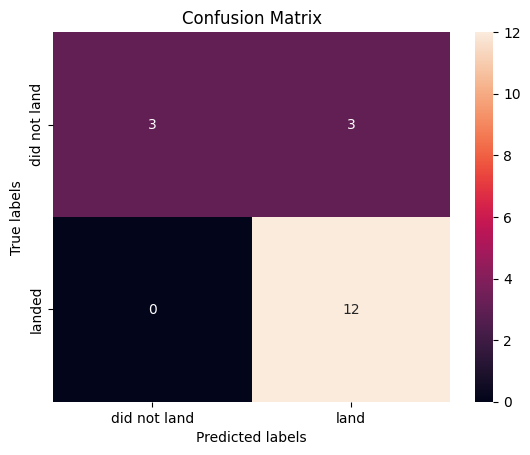

tuned hpyerparameters (best parameters) for SVM  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy of SVM: 0.8482142857142858
Accuracy on test data in SVM: 0.8333333333333334


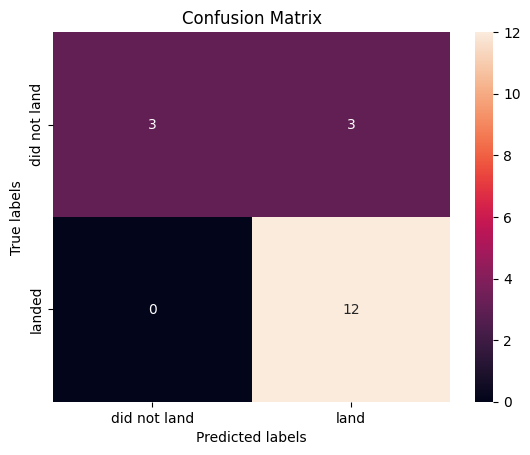

c:\Users\OMISTAJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\OMISTAJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\OMISTAJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\OMISTAJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been depre

tuned hyperparameters (best parameters) in Decision Tree: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy of Decision Tree: 0.8625
Accuracy on test data in Decision Tree: 0.9444444444444444


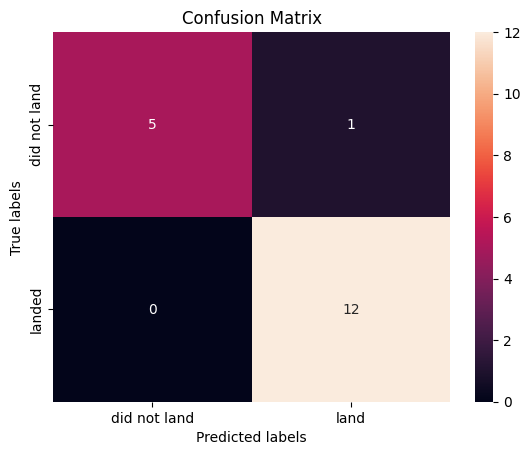

tuned hyperparameters (best parameters) K-nearest neighbour: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy of K-nearest neighbour: 0.8339285714285714
Accuracy on test data in K-nearest neighbour: 0.7777777777777778


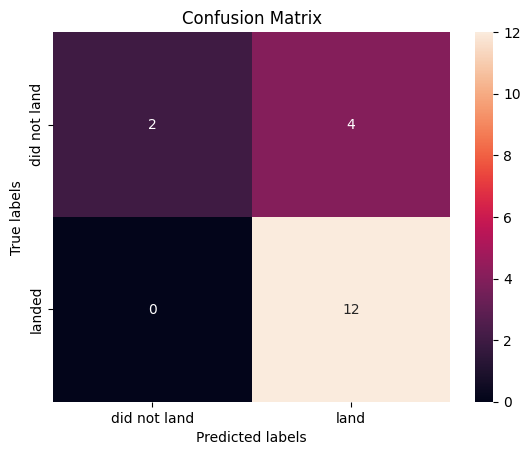

In [21]:
# Creating a summary dataframe from all four models and their test accuracies

lr = LogisticRegression()

parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

logreg_cv = GridSearchCV(lr, parameters, cv=10)

logreg_cv.fit(X_train, Y_train)

print("tuned hyperparameters (best parameters) for logistic regression:", logreg_cv.best_params_)
print("accuracy of logistic regression:", logreg_cv.best_score_)

y_pred = logreg_cv.predict(X_test)

accuracy_log = logreg_cv.score(X_test, Y_test)

print("Accuracy on test data in logistic regression:", accuracy_log)

yhat_log=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_log) #1

##

parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

svm = SVC()

svm_cv = GridSearchCV(svm, parameters, cv=10)

svm_cv.fit(X_train, Y_train)

print("tuned hpyerparameters (best parameters) for SVM ",svm_cv.best_params_)
print("accuracy of SVM:",svm_cv.best_score_)

best_svm_model = SVC(C=1.0, gamma=0.03162277660168379, kernel='sigmoid')

best_svm_model.fit(X_train, Y_train)

Y_pred = best_svm_model.predict(X_test)

accuracy_svc = best_svm_model.score(X_test, Y_test)

print("Accuracy on test data in SVM:", accuracy_svc)

yhat_svm=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_svm) #2

##

parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv=10)

tree_cv.fit(X_train, Y_train)

print("tuned hyperparameters (best parameters) in Decision Tree:", tree_cv.best_params_)
print("accuracy of Decision Tree:", tree_cv.best_score_)

y_pred = tree_cv.predict(X_test)

accuracy_dc = accuracy_score(Y_test, y_pred)

print("Accuracy on test data in Decision Tree:", accuracy_dc)

yhat_dc = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_dc) #3

##

KNN = KNeighborsClassifier()

# Define the parameter grid to search
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knn_cv = GridSearchCV(KNN, parameters, cv=10)

knn_cv.fit(X_train, Y_train)

print("tuned hyperparameters (best parameters) K-nearest neighbour:", knn_cv.best_params_)
print("accuracy of K-nearest neighbour:", knn_cv.best_score_)

y_pred = knn_cv.predict(X_test)

# Calculate accuracy by comparing predicted labels (y_pred) to actual labels (Y_test)
accuracy_knn = knn_cv.score(X_test, Y_test)

# Print the accuracy score
print("Accuracy on test data in K-nearest neighbour:", accuracy_knn)

yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_knn)

In [38]:
data_ml = {"Classification model":["Logistic Regression","Support Vector Machine (SVM)","Decision Tree","K-Nearest Neighbour"],
           "Tuned hyperparameter":[logreg_cv.best_params_,svm_cv.best_params_,tree_cv.best_params_,knn_cv.best_params_],
           "Validation data":[logreg_cv.best_score_,svm_cv.best_score_,tree_cv.best_score_,knn_cv.best_score_],
           "Test data":[accuracy_log,accuracy_svc,accuracy_dc,accuracy_knn]}

ml_summary_df_1 = pd.DataFrame(data=data_ml)

ml_summary_df_1

,Classification model,Tuned hyperparameter,Validation data,Test data
0,Logistic Regression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.821429,0.833333
1,Support Vector Machine (SVM),"{'C': 1.0, 'gamma': 0.03162277660168379, 'kern...",0.848214,0.833333
2,Decision Tree,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.862500,0.944444
3,K-Nearest Neighbour,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}",0.833929,0.777778


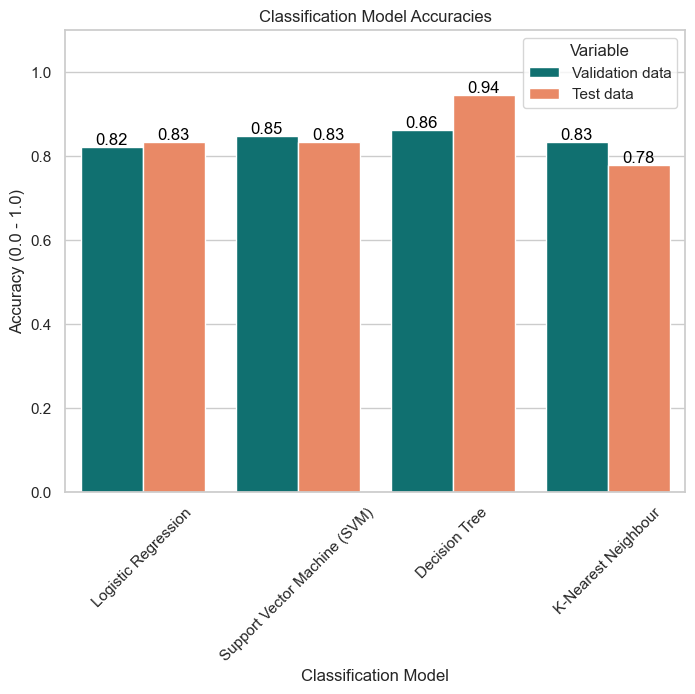

In [78]:
# Reshape the DataFrame using melt
melted_df = pd.melt(ml_summary_df_1, id_vars=["Classification model"], value_vars=["Validation data", "Test data"], var_name="Variable", value_name="Value")

# Create a barplot
plt.figure(figsize=(8, 6))
colors_ml = ["teal","coral"]
sns.barplot(data=melted_df, x="Classification model", y="Value", hue="Variable",palette=colors_ml)

plt.xlabel("Classification Model")
plt.ylabel("Accuracy (0.0 - 1.0)")
plt.title("Classification Model Accuracies")

plt.xticks(rotation=45)
plt.ylim(0, 1.1)

# Add values to the bars
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


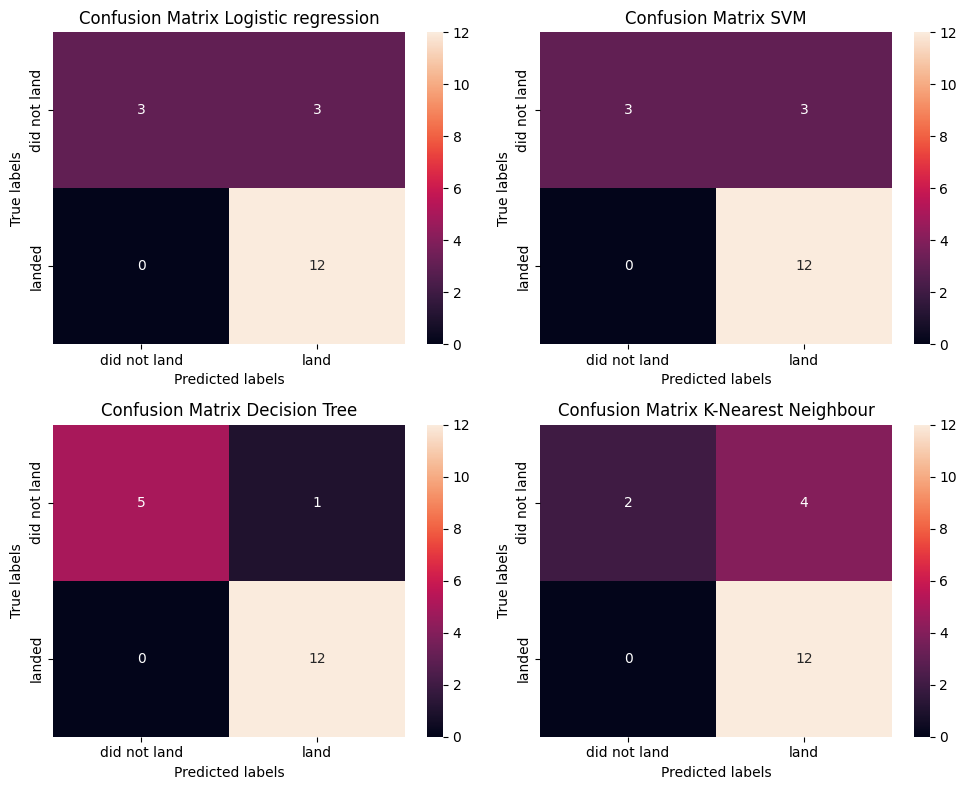

In [24]:
# Creating a summary of four confusion matrixes

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Modify the plot_confusion_matrix function to accept an ax argument
def plot_confusion_matrix(y,y_predict,headline,ax=None):
    "This function plots the confusion matrix."
    
    cm = confusion_matrix(y, y_predict)
    if ax is None:
        ax = plt.gca()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(headline) #
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the confusion matrices in each subplot
plot_confusion_matrix(Y_test, yhat_log,"Confusion Matrix Logistic regression",ax=axes[0, 0])
plot_confusion_matrix(Y_test, yhat_svm,"Confusion Matrix SVM",ax=axes[0, 1])
plot_confusion_matrix(Y_test, yhat_dc,"Confusion Matrix Decision Tree",ax=axes[1, 0])
plot_confusion_matrix(Y_test, yhat_knn,"Confusion Matrix K-Nearest Neighbour",ax=axes[1, 1])

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()
